In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names = pd.read_csv('supplements/TabS1_strain_names.csv')
transfers = pd.read_csv('supplements/TabS2_transfers.csv')

In [84]:
names.head()

,Short ID,NCBI Accession,Host Species,Collection Region,Collection Year
0,Wuhan-Hu-1,NC045512,Human,Hubei,2019
1,RaTG13,MN996532,Bat,Yunnan,2013
2,CoVZC45,MG772933,Bat,Zhejiang,2017
3,CoVZXC21,MG772934,Bat,Zhejiang,2015
4,SARS-CoV,NC004718,Human,Toronto,2003


In [85]:
transfers.head()

,Donor,Recipient,Gene Family,Support,MAD Support,Time Consistent?
0,n15,YN2018A,S,1000,1000,Yes
1,GX2013,n44,S,1000,1000,Yes
2,Rp3,Rm1,S,1000,1000,Yes
3,HKU3_7,GX2013,ORF7a,1000,1000,Yes
4,LYRa11,CpY11,ORF7a,1000,718,Yes


## Support Values using DTL Rooting

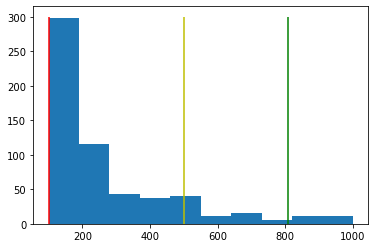

In [21]:
plt.hist(transfers['Support'])
plt.vlines([100,500,808],0,300,colors=['r','y','g'])
plt.show()

In [22]:
print(f"# 95th Percentile: {len(transfers[transfers['Support'] >= 100])}")
print(f"# 99th Percentile: {len(transfers[transfers['Support'] >= 500])}")
print(f"# 99.5th Percentile: {len(transfers[transfers['Support'] >= 808])}")

# 95th Percentile: 588
# 99th Percentile: 78
# 99.5th Percentile: 25


## Support by Gene Family

In [81]:
supports = pd.DataFrame(np.zeros((len(transfers['Gene Family'].unique()), 3)),
                        index=transfers['Gene Family'].unique(),
                        columns=[100, 500, 808],
                        )
supports.index.name = 'Gene Family'

In [83]:
for gf in supports.index:
    for su in supports.columns:
        supports.loc[gf,su] = len(transfers[(transfers['Gene Family'] == gf) & (transfers['Support'] >= su)])
supports

,100,500,808
Gene Family,,,
S,54.0,13.0,4.0
ORF7a,65.0,12.0,4.0
ORF3a,47.0,10.0,6.0
ORF1ab,42.0,11.0,3.0
M,63.0,11.0,3.0
ORF6,50.0,6.0,2.0
ORF8,68.0,4.0,1.0
N,74.0,9.0,2.0
ORF10,26.0,2.0,0.0


## Ancestral and Leaf Numbers

In [30]:
print("# Among 95th Percentile")
print(f"""## Leaf-to-Leaf: {len(transfers[(transfers['Support'] >= 100) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Leaf-to-Ancestor: {len(transfers[(transfers['Support'] >= 100) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Leaf: {len(transfers[(transfers['Support'] >= 100) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Ancestor: {len(transfers[(transfers['Support'] >= 100) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")

# Among 95th Percentile
## Leaf-to-Leaf: 226
## Leaf-to-Ancestor: 134
## Ancestor-to-Leaf: 113
## Ancestor-to-Ancestor: 115


In [32]:
print("# Among 99th Percentile")
print(f"""## Leaf-to-Leaf: {len(transfers[(transfers['Support'] >= 500) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Leaf-to-Ancestor: {len(transfers[(transfers['Support'] >= 500) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Leaf: {len(transfers[(transfers['Support'] >= 500) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Ancestor: {len(transfers[(transfers['Support'] >= 500) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")

# Among 99th Percentile
## Leaf-to-Leaf: 35
## Leaf-to-Ancestor: 18
## Ancestor-to-Leaf: 14
## Ancestor-to-Ancestor: 11


In [87]:
transfers[(transfers['Support'] >= 500) &
        (transfers['Donor'].str.startswith('n')) &
        (transfers['Recipient'].str.startswith('n'))]

,Donor,Recipient,Gene Family,Support,MAD Support,Time Consistent?
24,n49,n50,N,813,456,Yes
31,n40,n47,N,715,<100,Within One Branch
34,n51,n47,ORF1ab,700,<100,No
43,n49,n50,S,640,616,Yes
47,n50,n2,ORF7a,600,<100,No
55,n35,n5,M,549,<100,Yes
58,n2,n35,ORF1ab,537,317,Within One Branch
59,n48,n2,ORF1ab,537,<100,No
70,n6,n38,S,502,500,Yes
73,n38,n5,ORF3a,500,500,Within One Branch


In [34]:
print("# Among 99.5th Percentile")
print(f"""## Leaf-to-Leaf: {len(transfers[(transfers['Support'] >= 808) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Leaf-to-Ancestor: {len(transfers[(transfers['Support'] >= 808) &
                                    (~transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Leaf: {len(transfers[(transfers['Support'] >= 808) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (~transfers['Recipient'].str.startswith('n'))])}""")
print(f"""## Ancestor-to-Ancestor: {len(transfers[(transfers['Support'] >= 808) &
                                    (transfers['Donor'].str.startswith('n')) &
                                    (transfers['Recipient'].str.startswith('n'))])}""")

# Among 99.5th Percentile
## Leaf-to-Leaf: 13
## Leaf-to-Ancestor: 7
## Ancestor-to-Leaf: 4
## Ancestor-to-Ancestor: 1


## Inter- and Intra- Host Numbers

In [46]:
mrg = pd.merge(transfers,names,left_on='Donor',right_on='Short ID',how='inner')
mrg = pd.merge(mrg,names,left_on='Recipient',right_on='Short ID',how='inner')
mrg = mrg[['Donor','Recipient','Support','Gene Family','Host Species_x','Host Species_y']].rename(
    {'Host Species_x': 'Donor Species', 'Host Species_y': 'Recipient Species'},axis=1
)
mrg.head()

,Donor,Recipient,Support,Gene Family,Donor Species,Recipient Species
0,GX2013,F46,491,E,Bat,Bat
1,YN2018B,F46,100,ORF7b,Bat,Bat
2,Rf4092,F46,106,S,Bat,Bat
3,Rs4255,F46,700,M,Bat,Bat
4,GX2013,Anlong-103,276,ORF8,Bat,Bat


In [48]:
print("# Among 95th Percentile")
print(f"""## Intra-Host: {len(mrg[(mrg['Support'] >= 100) &
                                  (mrg['Donor Species'] == mrg['Recipient Species'])
                                ])}""")
print(f"""## Inter-Host: {len(mrg[(mrg['Support'] >= 100) &
                                  (mrg['Donor Species'] != mrg['Recipient Species'])
                                ])}""")

# Among 95th Percentile
## Intra-Host: 215
## Inter-Host: 11


In [53]:
mrg[(mrg['Support'] >= 100) & (mrg['Donor Species'] != mrg['Recipient Species'])]

,Donor,Recipient,Support,Gene Family,Donor Species,Recipient Species
25,C010,CpY11,100,ORF10,Civet,Bat
36,Rp3,C020,438,ORF1ab,Bat,Civet
57,C020,Rp3,400,ORF1ab,Civet,Bat
80,SARS-CoV,SC2018,161,M,Human,Bat
155,A022,YN2018C,100,E,Civet,Bat
197,Rf4092,C007,200,ORF1ab,Bat,Civet
200,SARS-CoV,C010,600,ORF7a,Human,Civet
201,SARS-CoV,C010,100,ORF6,Human,Civet
202,SARS-CoV,C010,100,ORF10,Human,Civet
206,SARS-CoV,B039,115,M,Human,Civet


In [54]:
print("# Among 99th Percentile")
print(f"""## Intra-Host: {len(mrg[(mrg['Support'] >= 500) &
                                  (mrg['Donor Species'] == mrg['Recipient Species'])
                                ])}""")
print(f"""## Inter-Host: {len(mrg[(mrg['Support'] >= 500) &
                                  (mrg['Donor Species'] != mrg['Recipient Species'])
                                ])}""")

# Among 99th Percentile
## Intra-Host: 34
## Inter-Host: 1


In [55]:
mrg[(mrg['Support'] >= 500) & (mrg['Donor Species'] != mrg['Recipient Species'])]

,Donor,Recipient,Support,Gene Family,Donor Species,Recipient Species
200,SARS-CoV,C010,600,ORF7a,Human,Civet


In [56]:
print("# Among 99.5th Percentile")
print(f"""## Intra-Host: {len(mrg[(mrg['Support'] >= 808) &
                                  (mrg['Donor Species'] == mrg['Recipient Species'])
                                ])}""")
print(f"""## Inter-Host: {len(mrg[(mrg['Support'] >= 808) &
                                  (mrg['Donor Species'] != mrg['Recipient Species'])
                                ])}""")

# Among 99.5th Percentile
## Intra-Host: 13
## Inter-Host: 0
